<a href="https://colab.research.google.com/github/augustolnb/IA-projects/blob/main/recognize_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

####Carregamento dos dados e preparação do dataframe

In [127]:
# Carrega o dataset Iris
iris = load_iris()

iris_df = pd.DataFrame(iris['data'], columns = ['comp_sepala', 'altura_sepala', 'comp_petala', 'altura_petala'])
iris_df['Variedade'] = iris['target']

iris_df['Variedade'] = iris_df['Variedade'].replace(0, 'Setosa')
iris_df['Variedade'] = iris_df['Variedade'].replace(1, 'Versicolor')
iris_df['Variedade'] = iris_df['Variedade'].replace(2, 'Virginica')

iris_df
#dir(iris)
#iris['target_names']

,comp_sepala,altura_sepala,comp_petala,altura_petala,Variedade
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


####Visualização dos dados

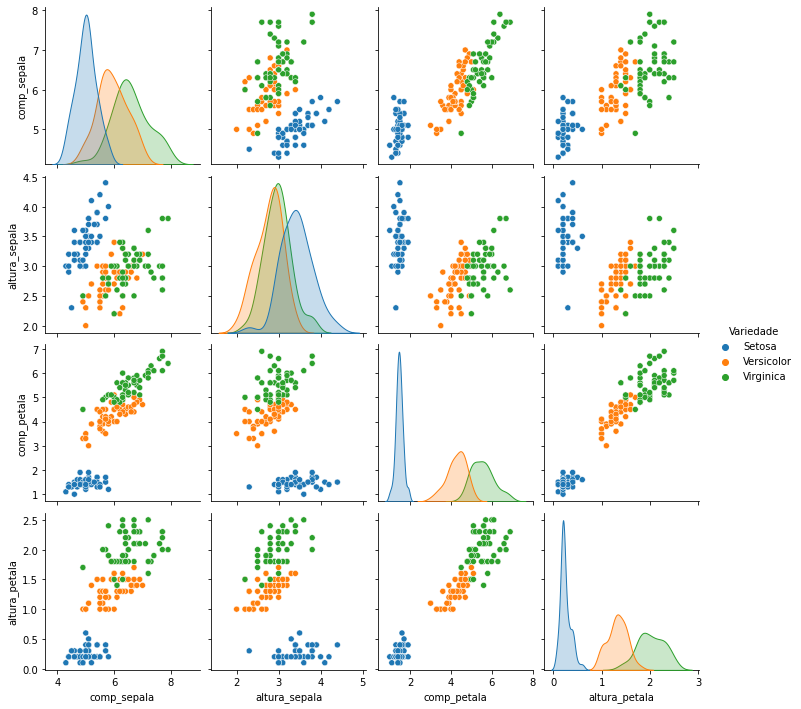

In [128]:
# Plota a distribuição dos dados em relação a cada caracteristica em nuvens de pontos

sb.pairplot(iris_df.dropna(), hue='Variedade')

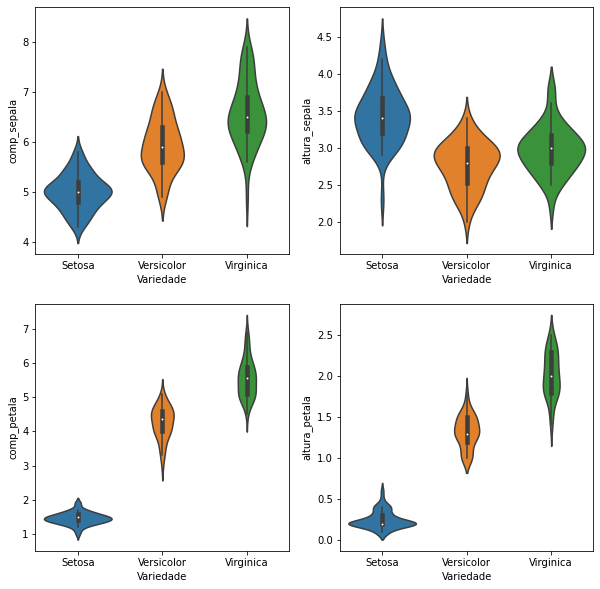

In [129]:
# Plota a distribuição dos dados em relação a cada caracteristica em gráficos violino

plt.figure(figsize=(10, 10))
for column_index, column in enumerate(iris_df.columns):
    if column == 'Variedade':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='Variedade', y=column, data=iris_df)

##Modelo Sequencial

#### Usando modelo sequencial + train_test_split method [+ eficiente]

In [32]:
# Divide em conjunto de treino e teste
(x_treino, 
 x_teste, 
 y_treino, 
 y_teste) = train_test_split(iris.data, iris.target, train_size=0.75, random_state=42)

# Cria o modelo
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=4, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compila o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treina o modelo
modelo=model.fit(x_treino, y_treino, epochs=50, batch_size=8, verbose=0, validation_split=0.1)

#### Usando modelo sequencial sem train_test_split method


In [18]:
# Cria o modelo
model = keras.Sequential([
    keras.layers.Dense(64, input_dim=4, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compila o modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treina o modelo
modelo=model.fit(iris.data, iris.target, epochs=150, batch_size=8, validation_split=0.2, verbose=0)

####Checagem de precisão do modelo

2/2 [==============================] - 0s 4ms/step
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


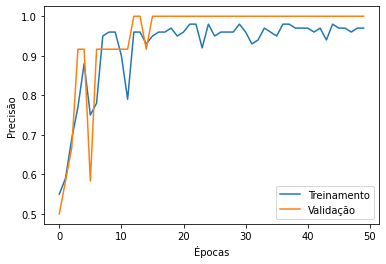

In [33]:
from sklearn.metrics import confusion_matrix

# Faz as previsões no conjunto de teste
y_pred = np.argmax(model.predict(x_teste), axis=-1)

# Cria a matriz de confusão
cm = confusion_matrix(y_teste, y_pred)
print(cm)

# plot the model accuracy and validation accuracy
plt.plot(modelo.history['accuracy'])
plt.plot(modelo.history['val_accuracy'])
plt.ylabel('Precisão')
plt.xlabel('Épocas')
plt.legend(['Treinamento','Validação'])

##Usando Árvore de Decisão

####Preparando os dados

In [83]:
# Gráfico pizza das variedades de flor
#iris_df['Variedade'].value_counts()
#iris_df['Variedade'].value_counts().plot(kind='pie');

# Adicionando features ao dataframe
iris_df['SepalArea'] = iris_df['comp_sepala'] * iris_df['altura_sepala']
iris_df['PetalArea'] = iris_df['comp_petala'] * iris_df['altura_petala']

# Hiperparâmetros do modelo
features = iris_df.columns.difference(['Variedade'])

#iris_df[features].values

#### Preparando amostras para teste de validação


In [120]:
# Seleciona 3 amostras para validar o modelo
amostra01=iris_df.iloc[1].to_numpy()
amostra02=iris_df.iloc[56].to_numpy()
amostra03=iris_df.iloc[103].to_numpy()

amostras = pd.DataFrame([amostra01, amostra02, amostra03], columns = ['comp_sepala', 'altura_sepala', 'comp_petala', 'altura_petala', 'Variedade', 'area_sepala', 'area_petala'])

amostra01=np.delete(amostra01, 4)
amostra02=np.delete(amostra02, 4)
amostra03=np.delete(amostra03, 4)

amostras

,comp_sepala,altura_sepala,comp_petala,altura_petala,Variedade,area_sepala,area_petala
0,4.9,3.0,1.4,0.2,Setosa,14.70,0.28
1,6.3,3.3,4.7,1.6,Versicolor,20.79,7.52
2,6.3,2.9,5.6,1.8,Virginica,18.27,10.08


####Treinando o modelo de árvore de decisão

In [121]:
tree_model = DecisionTreeClassifier(random_state=1997,
                                    criterion='entropy',
                                    max_depth=5)

tree_model.fit(iris_df[features].values, iris_df['Variedade'].values)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1997)

####Teste de validação

In [122]:
tree_model.predict([amostra01, amostra02, amostra03])

array(['Versicolor', 'Versicolor', 'Versicolor'], dtype=object)

####Validando o modelo

In [124]:
from sklearn.model_selection import cross_val_score

score_validation = cross_val_score(tree_model, iris_df[features].values, iris_df['Variedade'].values,
                            scoring='accuracy', cv=5)

print(score_validation.mean())

0.96


##Usando Floresta Randomica ... [a implementar]